# EDA - Home Sale Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.ticker as mtick

## Imporation des données

In [3]:
database = pd.read_csv("../Data/data_house.csv")

## Afficher les 10 première lignes du jeux de données et utiliser le .info()

In [4]:
database.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Suppression automatique des variables qui ont plus de 30% de valeurs manquantes

In [6]:
# Total number of NaN entries in a column must be less than 30% of total entries
database = database.loc[:, database.isna().sum() <= 0.3*database.shape[0]]

In [7]:
database.shape

(1460, 76)

## Afficher les informations de SalePrice

In [8]:
database['SalePrice'].describe().apply("{0:.2f}".format)

count      1460.00
mean     180921.20
std       79442.50
min       34900.00
25%      129975.00
50%      163000.00
75%      214000.00
max      755000.00
Name: SalePrice, dtype: object

## Afficher la distribution de SalePrice

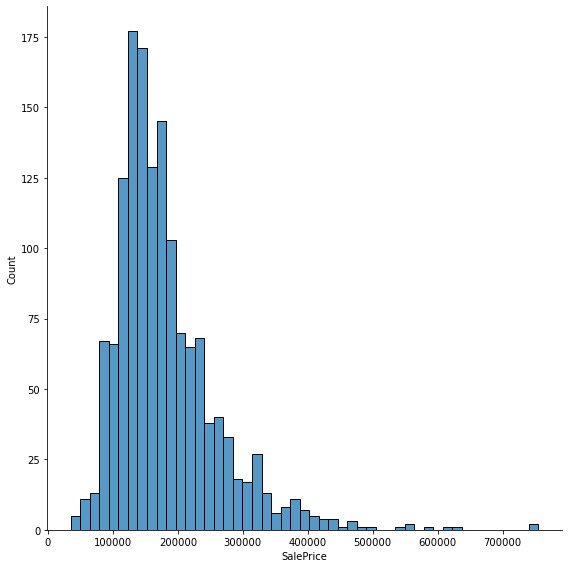

In [9]:
ax = sns.displot(database['SalePrice'], height=8)

### Question : Que pouvez vous dire?

Le Sale Price a une distribution autour de sa moyenne (180K$) s'approchant de la distribution normale, mais il y a aussi des valeurs extremes sur la droite de la distribution.

## Variables quantitatives

## Sélectionner les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. 

In [10]:
data_var = database.select_dtypes(include=['int64', 'float64'])

In [11]:
data_var.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


-


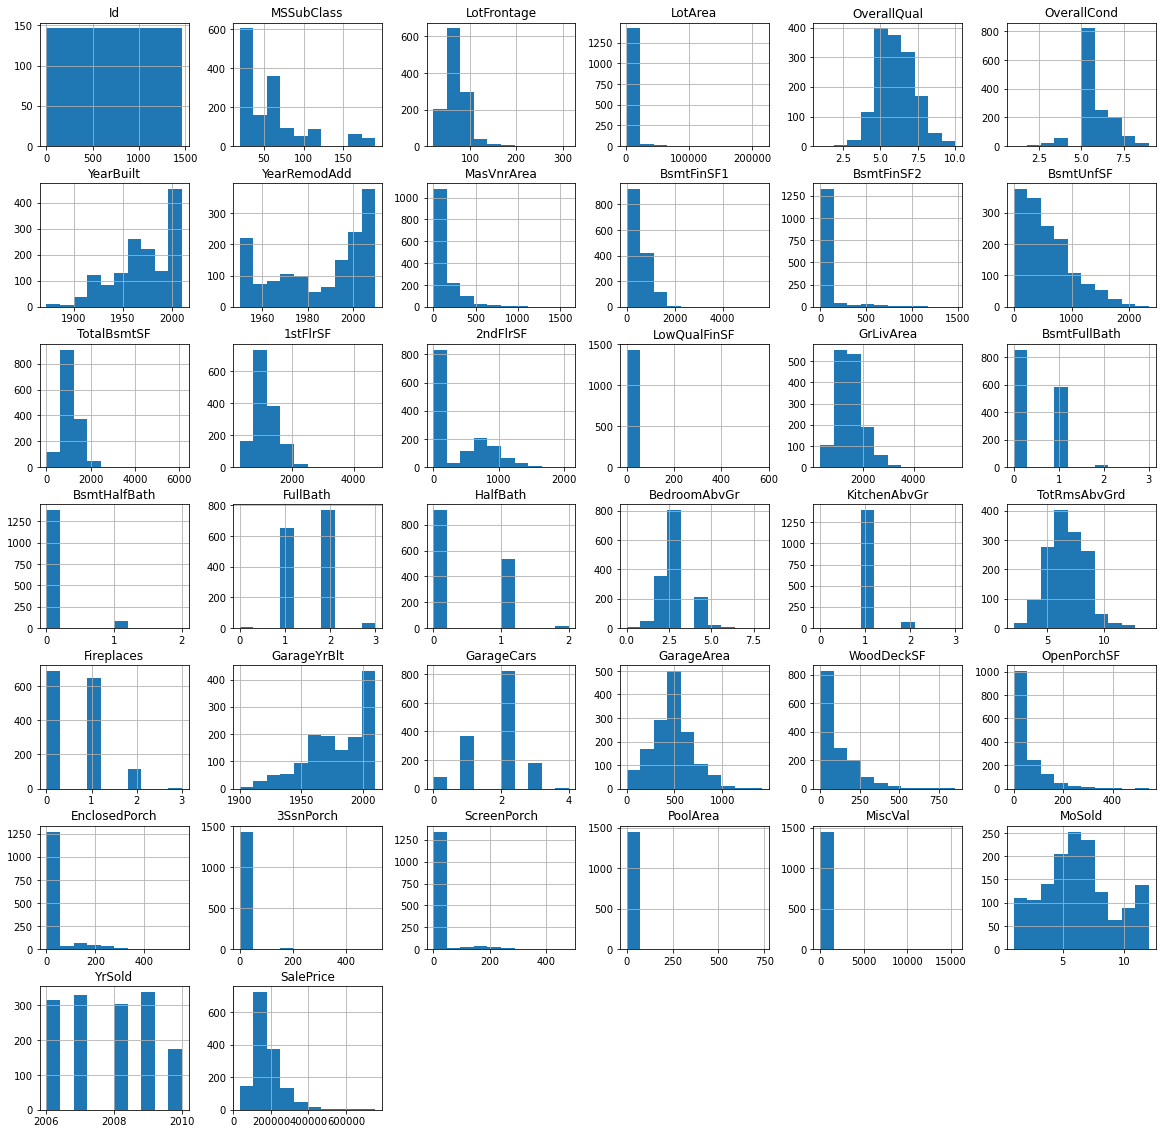

In [12]:
data_var.hist(figsize=(20,20))
print("-")

### Question : Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?

TotalBsmtSF (Total square feet of basement area), 1stFlrSF (First Floor square feet), GrLivArea (Above grade (ground) living area square feet)
On pourrait en conclure qu'elles sont probablement corrélées avec SalePrice

## Toujours sur les variables int64 + float64: Afficher les 10 variables les plus corrélées avec SalePrice.

In [13]:
all_corr = data_var.corr()

In [14]:
saleprice_corr = all_corr["SalePrice"]

In [15]:
top = saleprice_corr.abs().sort_values(ascending = False)
top.head(11)
# j'affiche 11 lignes car la première est la corrélation de SalePrice avec SalePrice, qui est égale à 1

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

## Toujours sur les variables int64 + float64: Réaliser un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. 

In [16]:
selected = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',  
    'GarageArea',  
    'TotalBsmtSF',
    '1stFlrSF',  
    'FullBath',      
    'TotRmsAbvGrd',  
    'YearBuilt', 
    'YearRemodAdd'
]

In [17]:
df = data_var.loc[:, selected]

In [18]:
df.shape

(1460, 11)

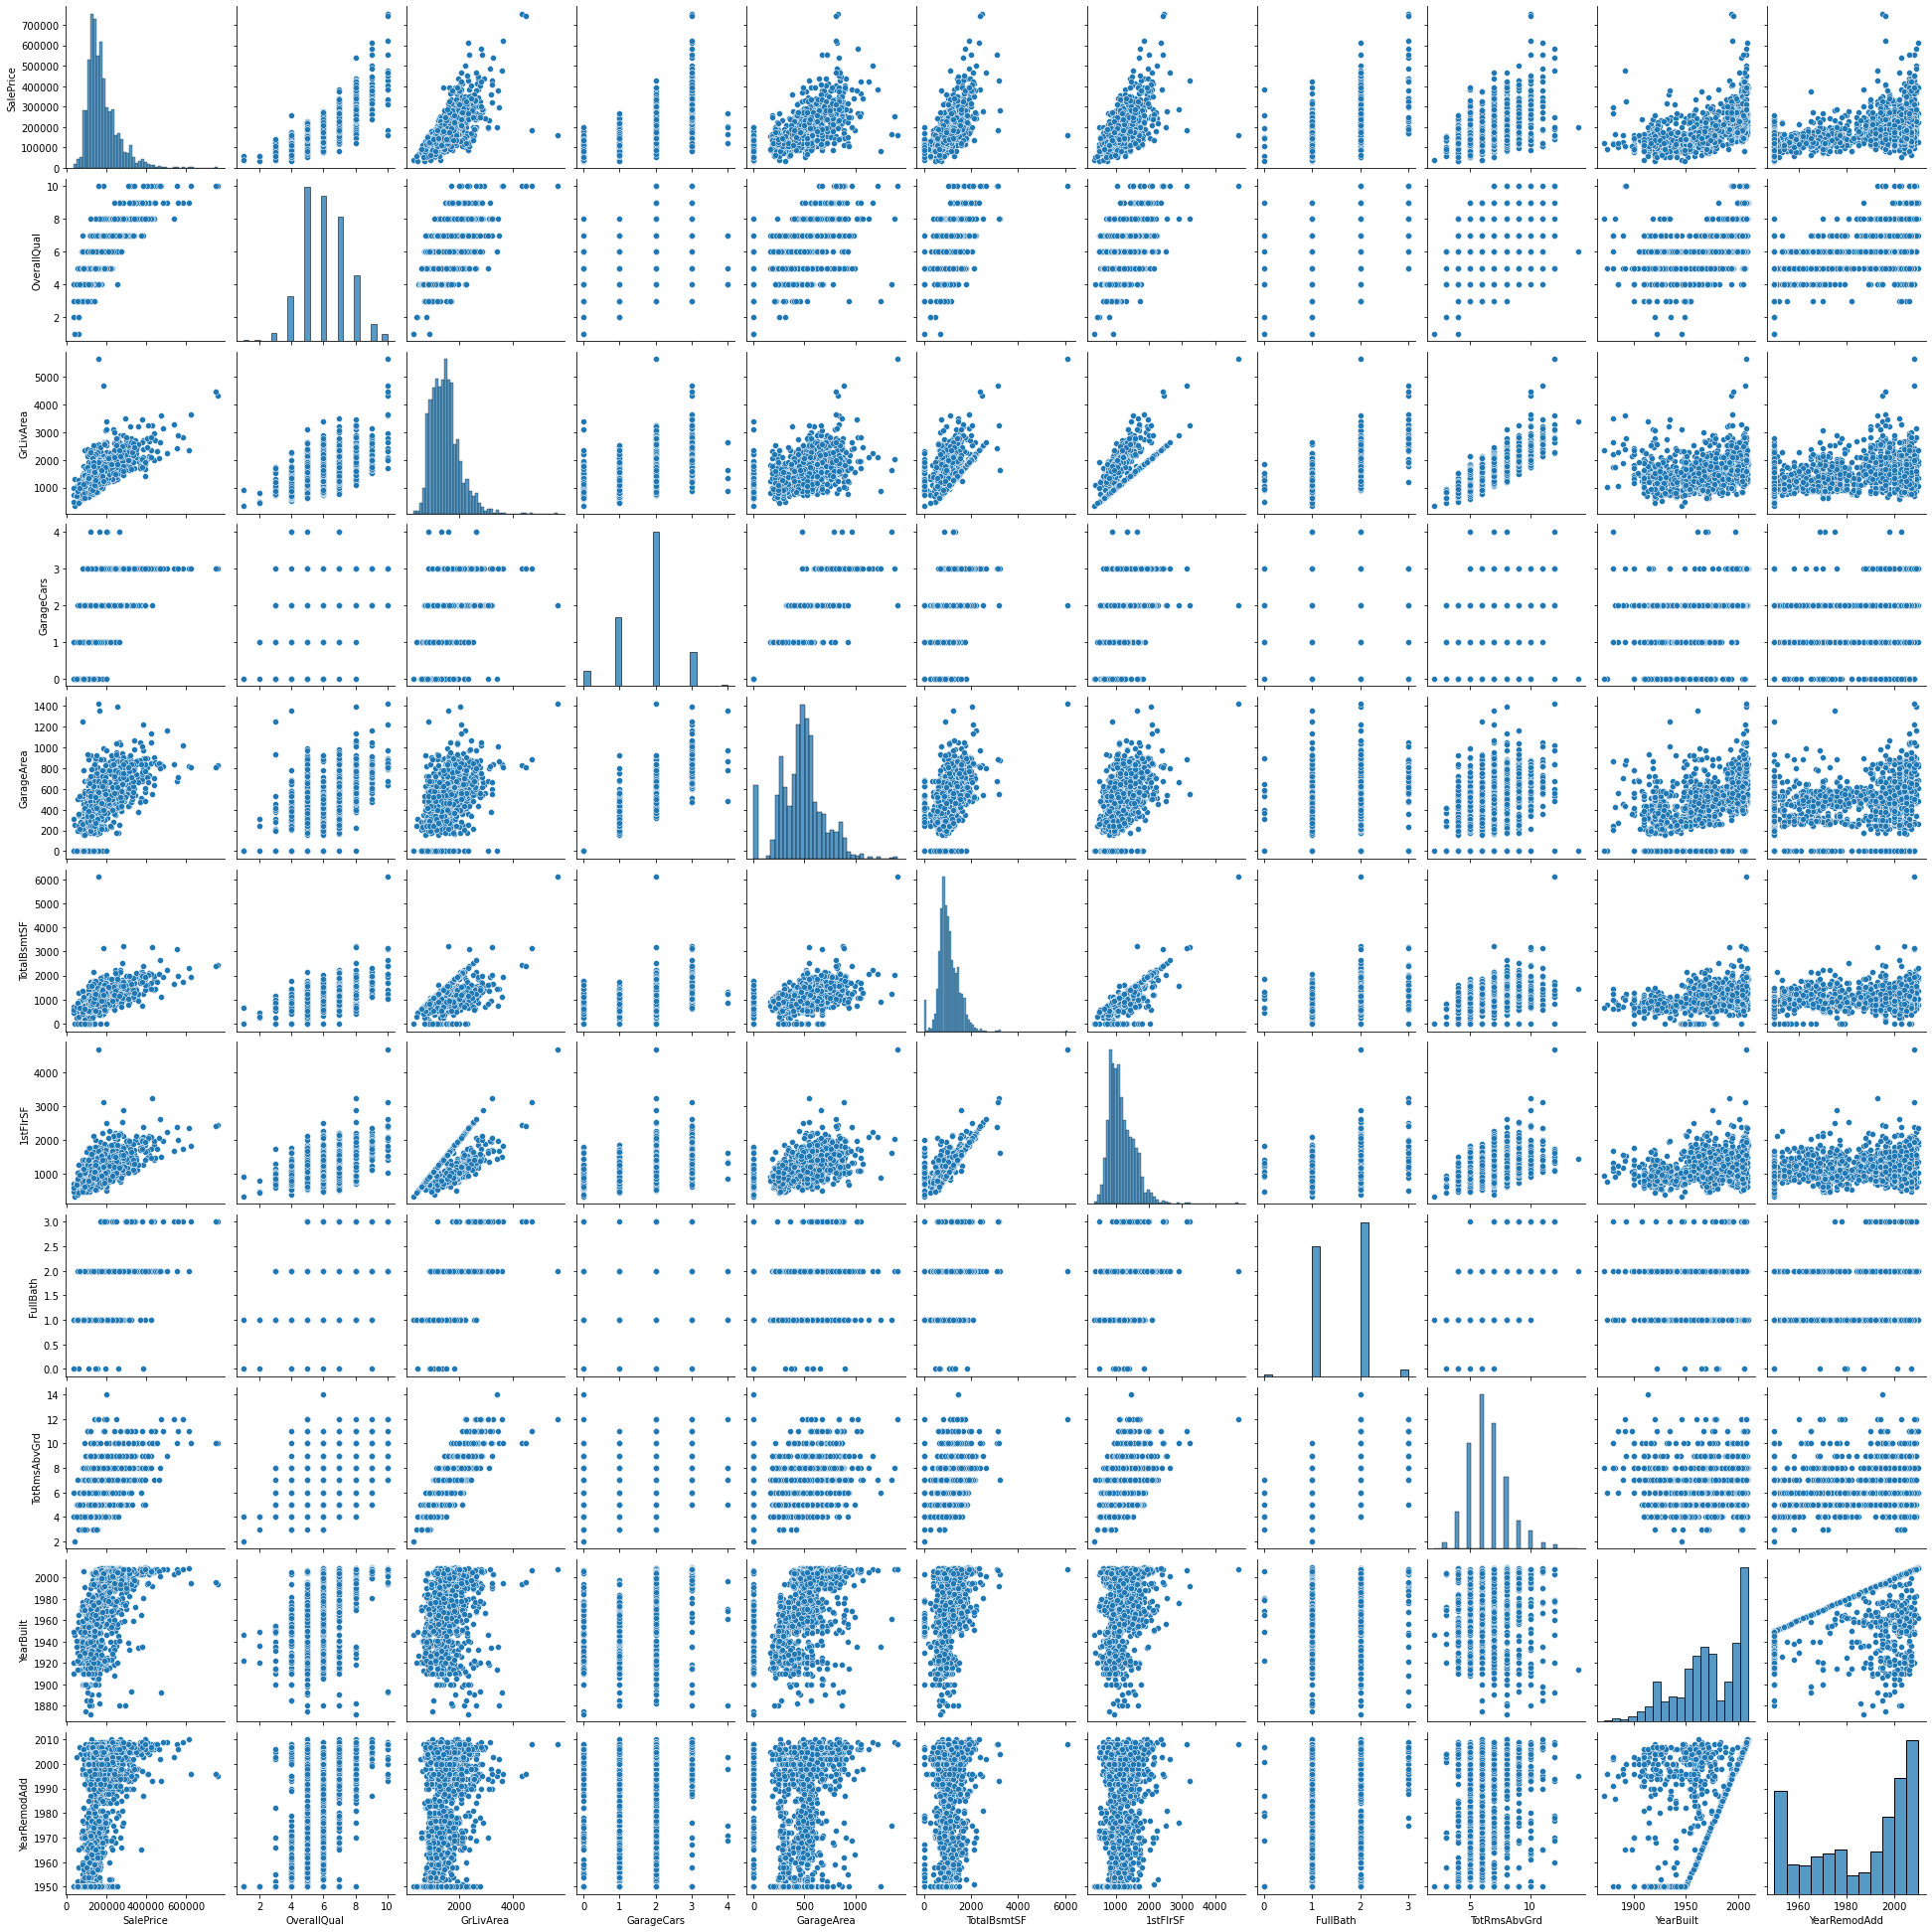

In [19]:
sns.pairplot(df)

### Question : quelle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?

Les 3 variables les plus corrélées avec SalePrice sont OverallQual, GrLivArea, GarageCars.

In [20]:
reselected = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars']

In [21]:
df2 = data_var.loc[:, reselected]
df2.shape

(1460, 4)

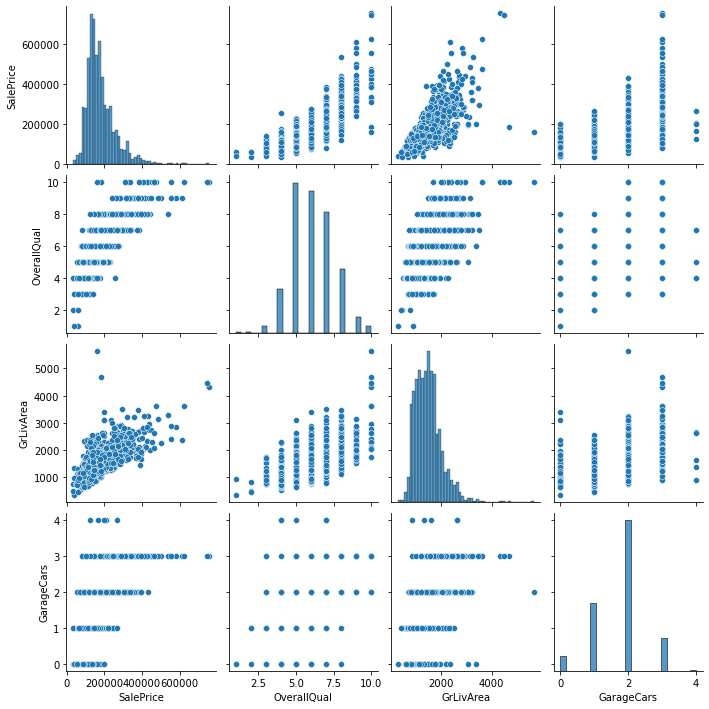

In [22]:
sns.pairplot(df2)

Plus les valeurs augentent, plus SalePrice augmente.

## Réaliser une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2

In [23]:
c =df.corr()

<AxesSubplot:>

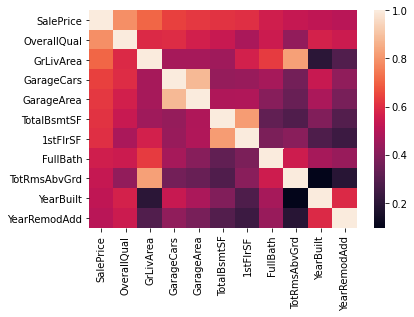

In [24]:
sns.heatmap(c)

###  Question : Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées

3 paires les plus corrélées : 

1 - GarageCars et GarageArea


2 - TotalBsmtSF et 1stFlrSF


3 - GrLivArea et TotRmsAbvGrd

On pourrait aussi prendre en compte la corrélation entre SalePrice et OverallQual

## Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.

In [25]:
new_selection = ['TotalBsmtSF', 
                 '1stFlrSF', 
                 '2ndFlrSF', 
                 'GrLivArea', 
                 'FullBath', 
                 'TotRmsAbvGrd', 
                 'GarageCars', 
                 'GarageArea', 
                 'SalePrice'
                ]

In [26]:
df = data_var.loc[:, new_selection]

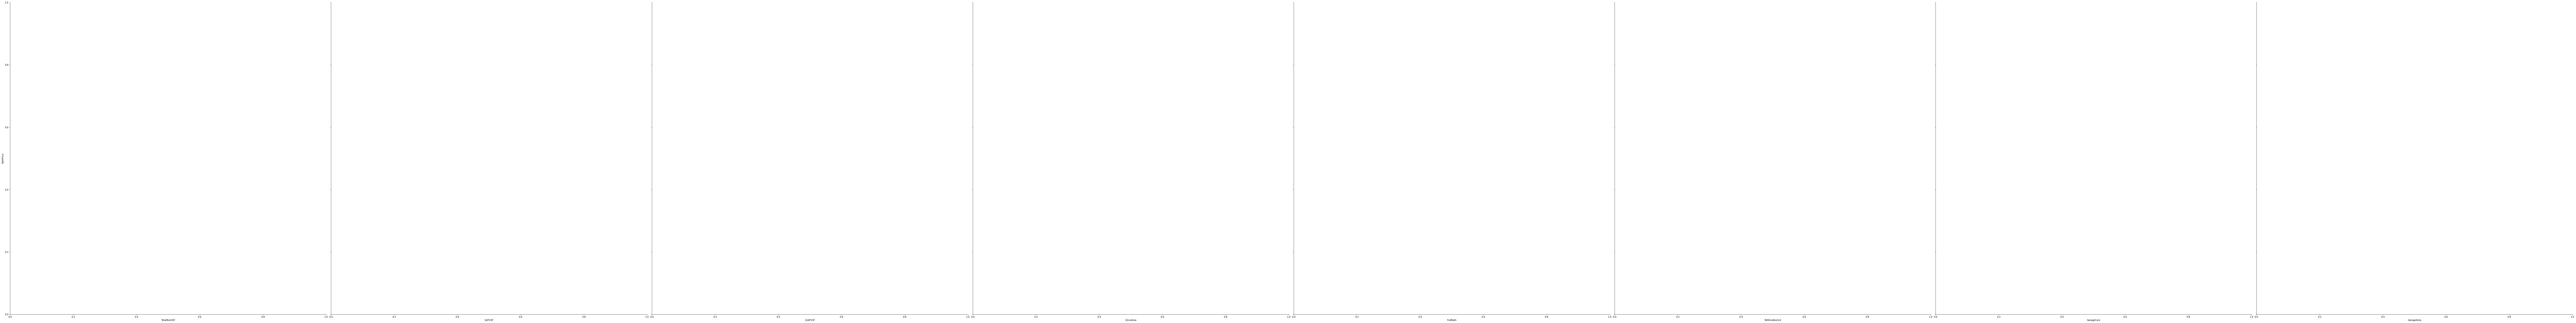

In [27]:
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=['TotalBsmtSF', 
                 '1stFlrSF', 
                 '2ndFlrSF', 
                 'GrLivArea', 
                 'FullBath', 
                 'TotRmsAbvGrd', 
                 'GarageCars', 
                 'GarageArea',
                ], height=20)

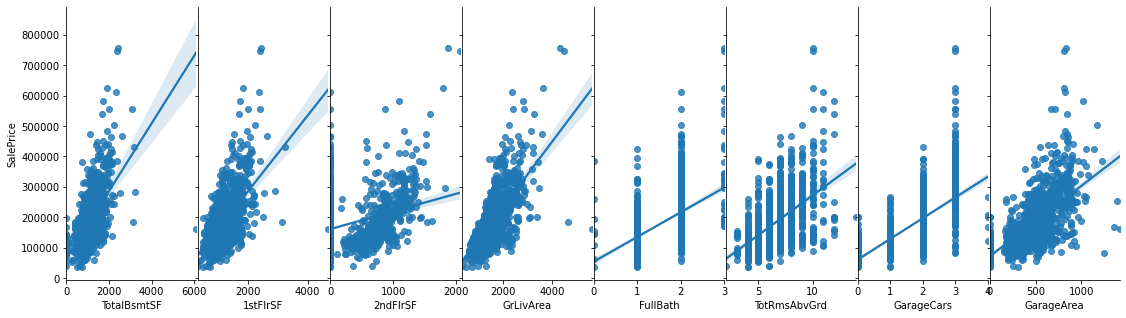

In [28]:
g.map(sns.regplot)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)

## Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

In [29]:
col = ['SalePrice', 'GrLivArea']

In [30]:
df3 = database.loc[:, col]

In [31]:
from scipy import stats

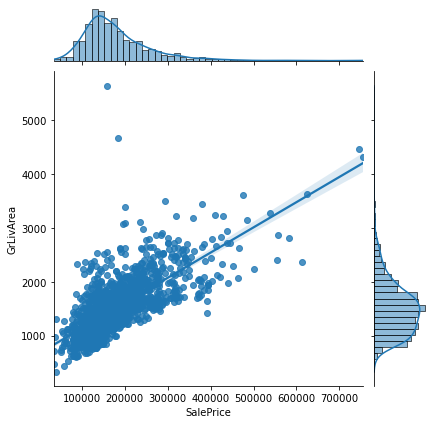

In [32]:
sns.jointplot(data=df3, x="SalePrice", y="GrLivArea", kind="reg")

In [33]:
stat=stats.pearsonr(df3['SalePrice'], df3['GrLivArea'])[0] ** 2

In [34]:
print(stat)

0.502148650271804


## Variables qualitatives

## Réalisez un code permettant d'identifier automatiquement les variables de type Object

In [35]:
data_obj = database.select_dtypes(include=['object'])

In [36]:
data_obj.shape

(1460, 38)

## Sur la liste de variables obtenus, utilisez un countplot sur toutes les variables

In [47]:
uniq = data_obj['Neighborhood'].unique()
len(uniq)

25

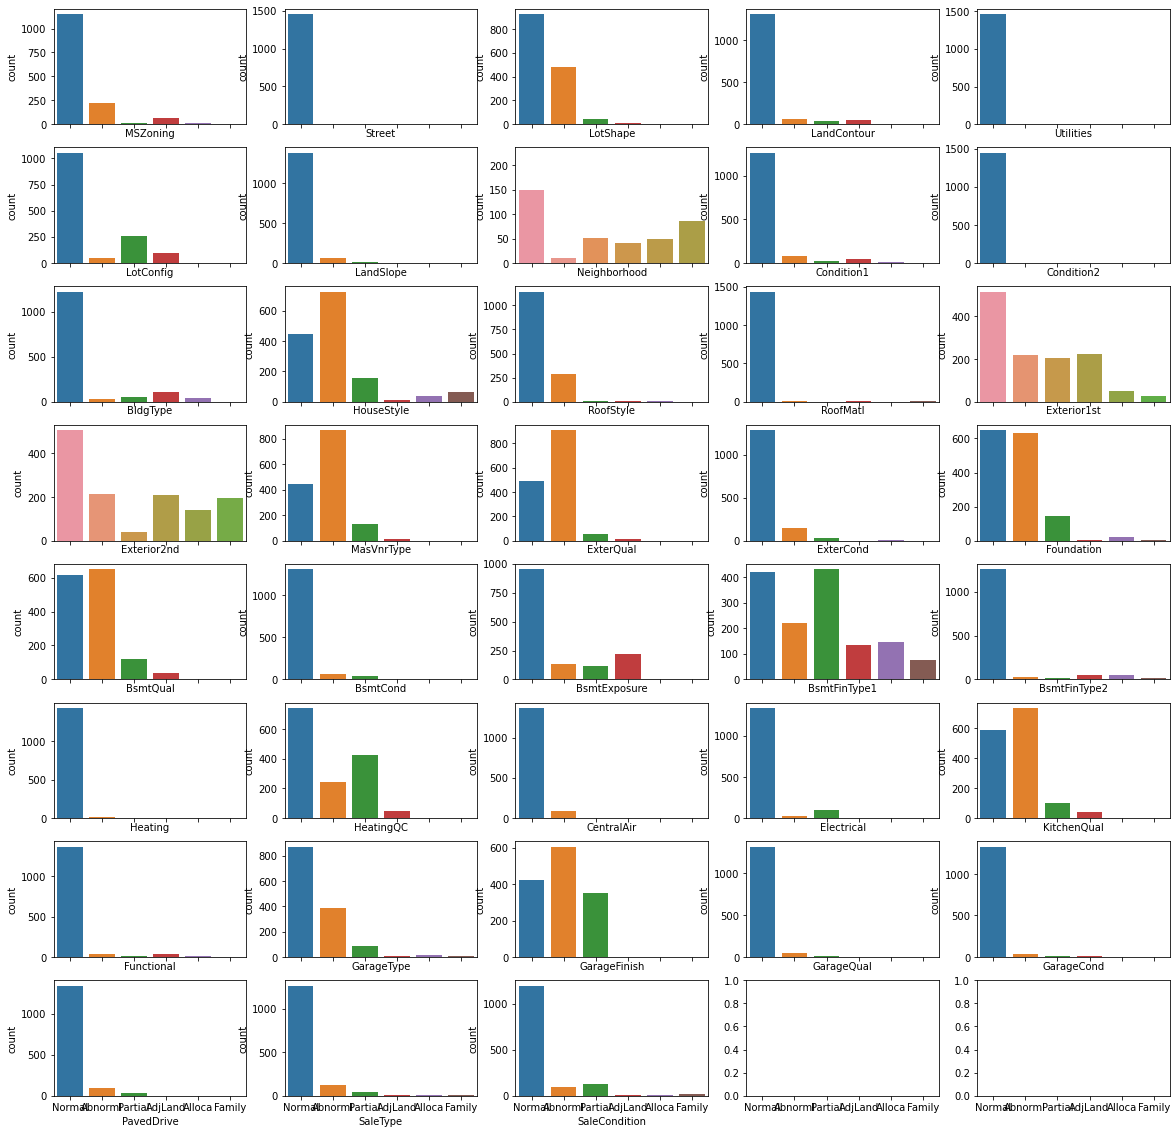

In [43]:
f, axes = plt.subplots(8,5,figsize=(20,20), sharex=True)
for f,ax in zip(data_obj.columns, axes.ravel()):
    sns.countplot(x=data_obj[f], ax=ax)

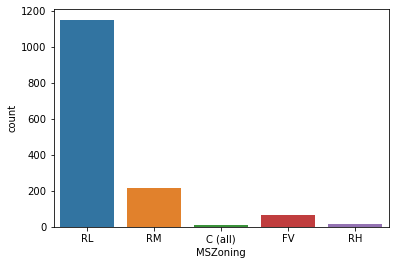

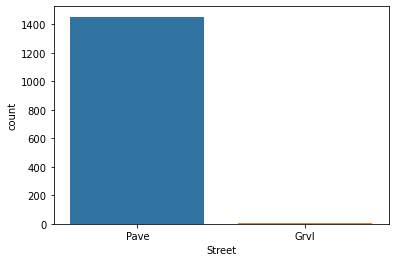

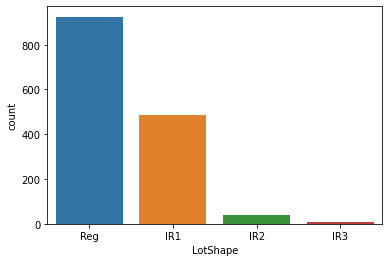

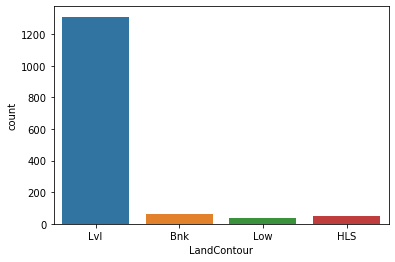

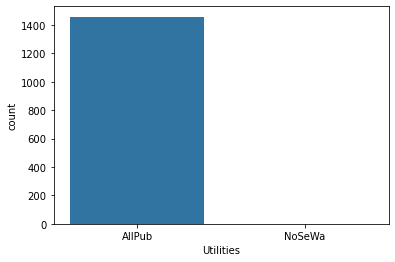

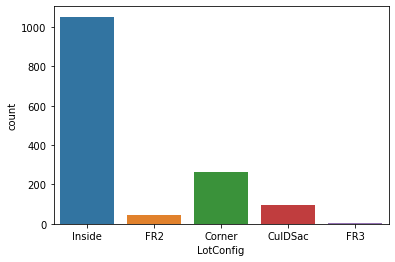

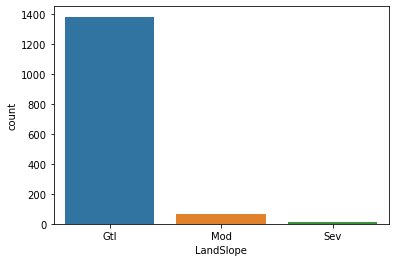

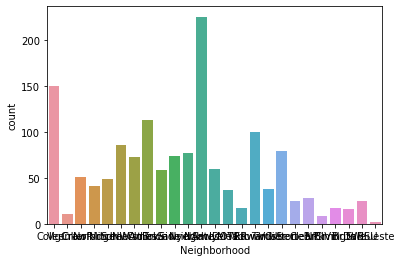

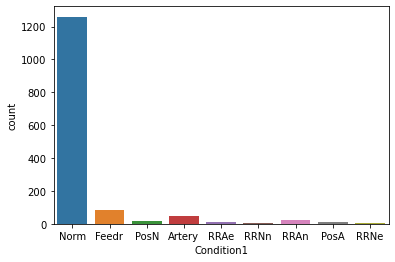

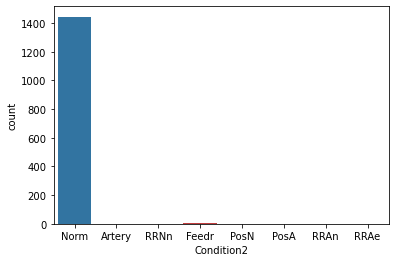

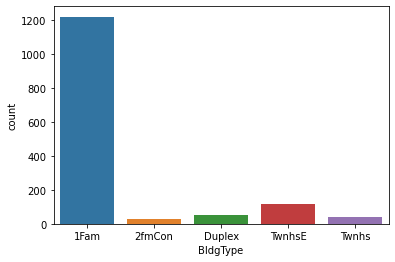

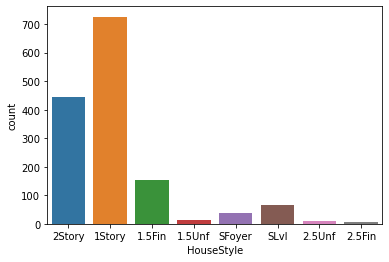

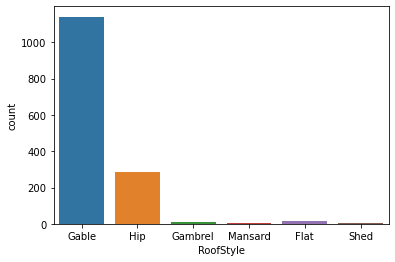

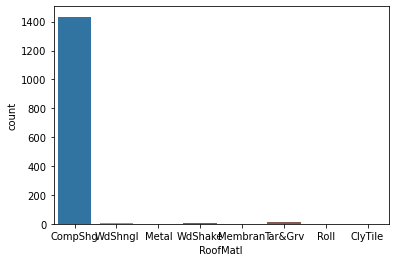

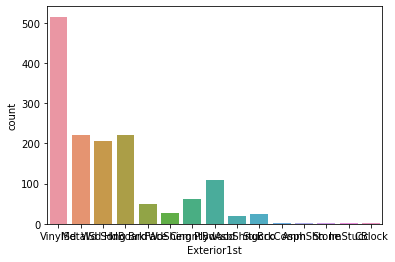

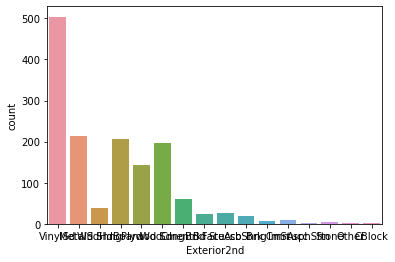

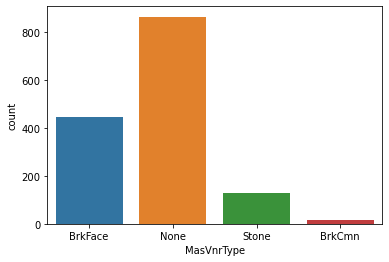

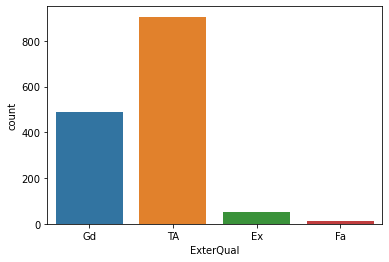

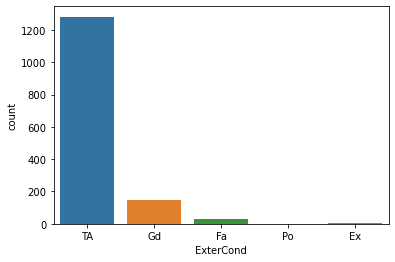

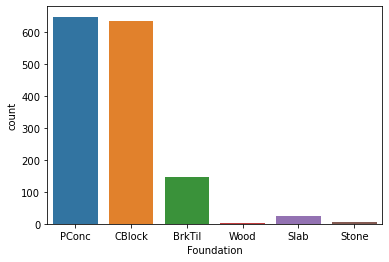

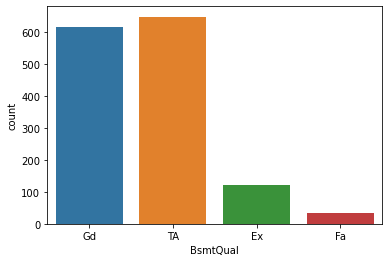

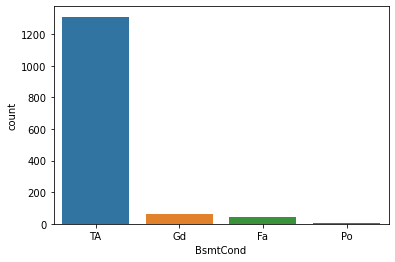

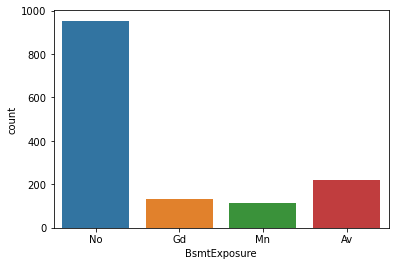

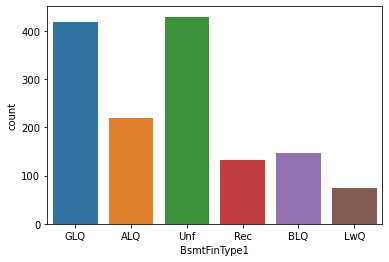

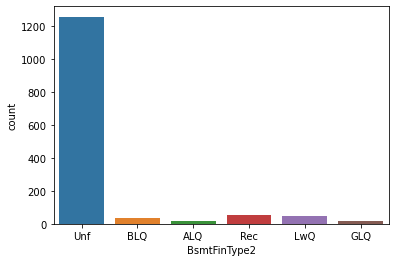

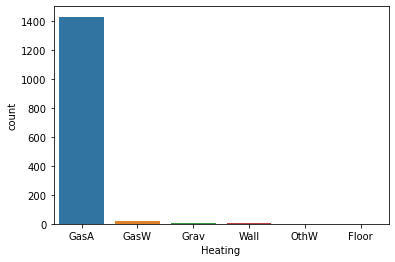

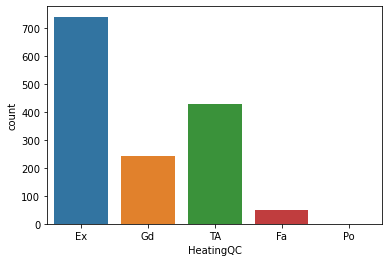

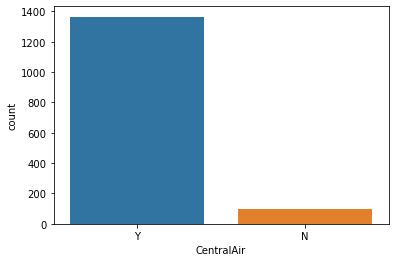

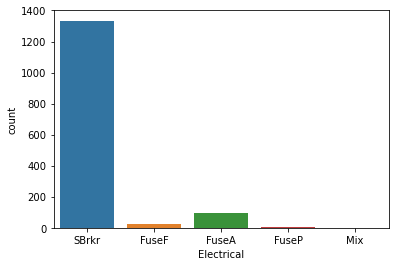

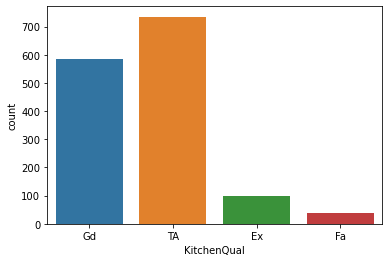

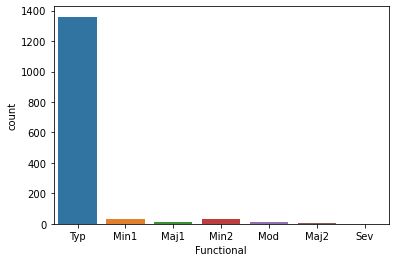

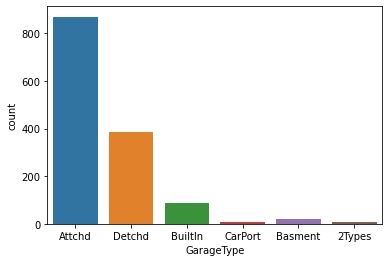

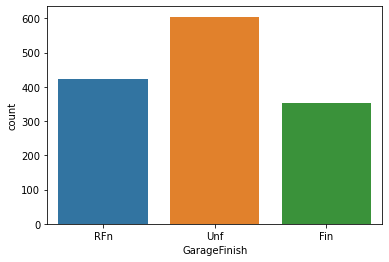

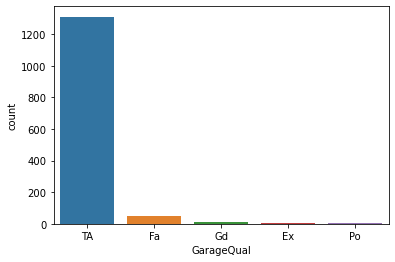

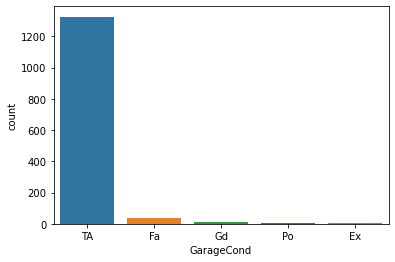

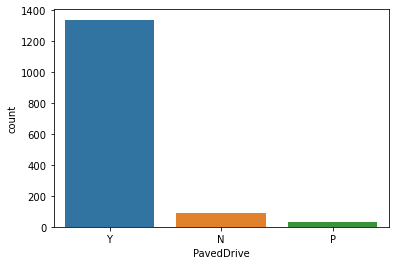

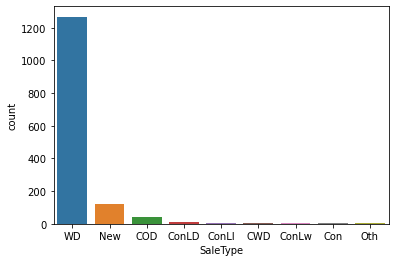

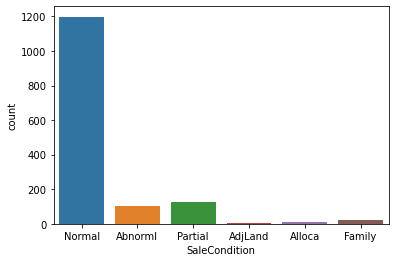

In [48]:
for col in data_obj.columns:
    sns.countplot(x=data_obj[col])
    plt.show()

## Listez au moins 5 variables que ne vous semble pas pertinente pour expliquer le prix d'une maison.

Utilities, Condition 2, RoofMati, Heating, GarageCond

In [51]:
df_pave = data_obj.loc[data_obj['Street']=='Pave']
a = round(((df_pave['Street'].shape[0])*100)/1460,2)

df_pave = data_obj.loc[data_obj['Utilities']=='AllPub']
b = round(((df_pave['Utilities'].shape[0])*100)/1460,2)

df_pave = data_obj.loc[data_obj['Condition2']=='Norm']
c = round(((df_pave['Condition2'].shape[0])*100)/1460,2)

df_pave = data_obj.loc[data_obj['RoofMatl']=='CompShg']
d = round(((df_pave['RoofMatl'].shape[0])*100)/1460,2)

df_pave = data_obj.loc[data_obj['Heating']=='GasA']
e = round(((df_pave['Heating'].shape[0])*100)/1460,2)

In [52]:
print("Si une variable a la même valeur dans tous le jeu de donnée elle n'a aucun intéret:"+"\n"+
"- street ("+str(a)+"% en Pave)"+"\n"+
"- Utilities ("+str(b)+"% AllPub)"+"\n"+
"- Condition2 ("+str(c)+"% Norm)"+"\n"+
"- RoofMatl ("+str(d)+"% CompShg)"+"\n"+
"- Heating ("+str(e)+"% en GasA)"
)

Si une variable à la même valeur dans tous le jeu de donnée elle n'a aucun intéret:
- street (99.59% en Pave)
- Utilities (99.93% AllPub)
- Condition2 (98.97% Norm)
- RoofMatl (98.22% CompShg)
- Heating (97.81% en GasA)
